# Seaborn을 이용한 주요 시각화 그래프

- Seaborn 공식 사이트 : https://seaborn.pydata.org/tutorial.html
- Matplotlib 기반으로 쉽게 작성됨. Matplotlib의 high level API
- Matplotlib 보다 수려한 디자인을 제공하며 Pandas와 쉽게 연동
- 그러나 Matplotlib을 어느 정도 알고 있어야함

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

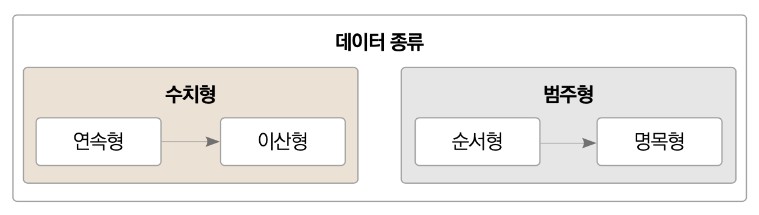

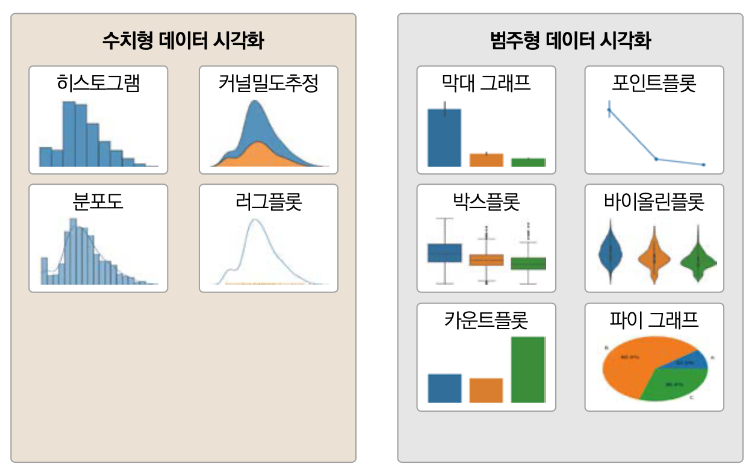

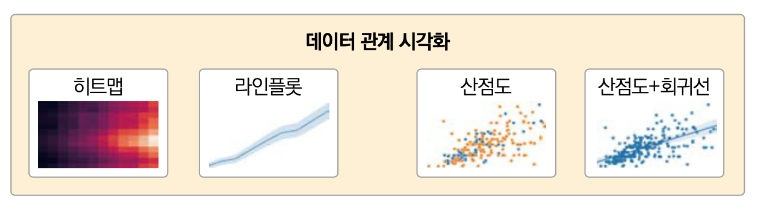

In [6]:
titanic = pd.read_csv('./file/0519/titanic_train.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 1. 수치형 데이터 시각화

### 1. 히스토그램
- 수치형 데이터의 구간별 빈도수를 나타내는 그래프

<Axes: xlabel='Age', ylabel='Count'>

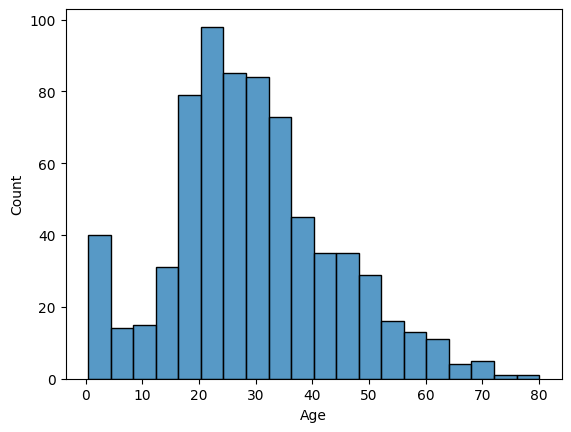

In [7]:
sns.histplot(data=titanic, x='Age', bins=20)

<Axes: xlabel='Age', ylabel='Count'>

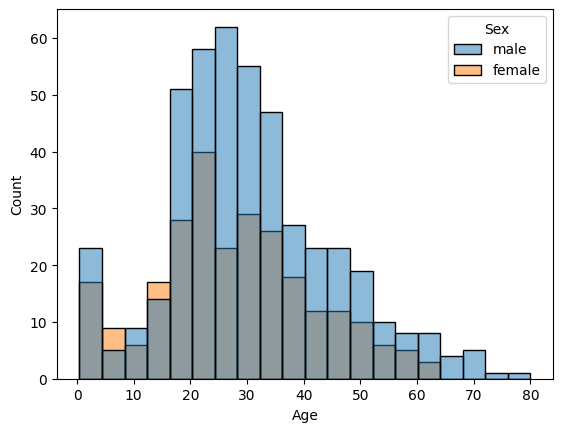

In [8]:
sns.histplot(data=titanic, x='Age', bins=20, hue='Sex')

<Axes: xlabel='Age', ylabel='Count'>

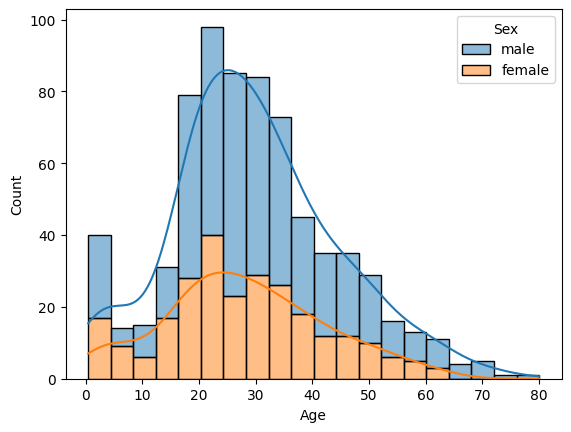

In [9]:
sns.histplot(data=titanic, x='Age', bins=20, hue='Sex', multiple='stack', kde=True)

### 2. 커널밀도추정 함수

- 히스토그램을 매끄럽게 곡선으로 연결한 그래프

<Axes: xlabel='Age', ylabel='Density'>

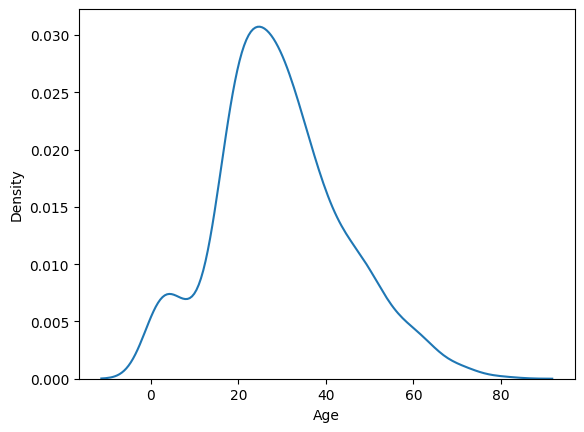

In [10]:
sns.kdeplot(data=titanic, x='Age')

<Axes: xlabel='Age', ylabel='Density'>

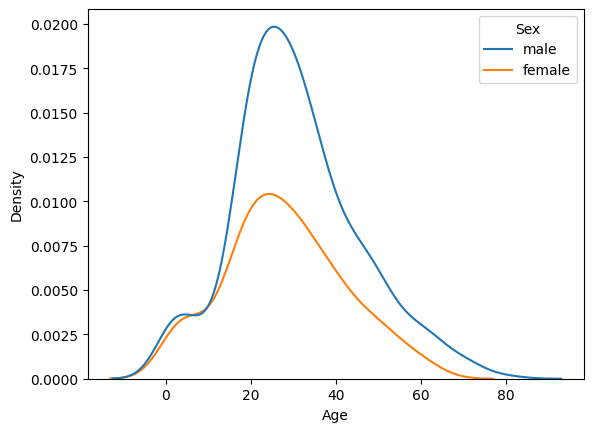

In [11]:
sns.kdeplot(data=titanic, x='Age', hue='Sex')

- Figure-level vs. axes-level

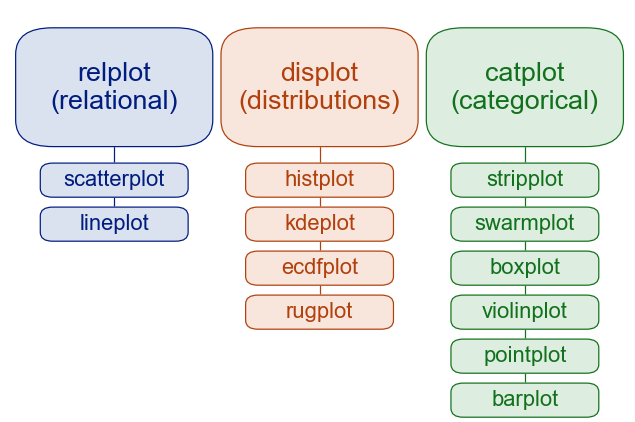

<Figure size 1000x400 with 0 Axes>

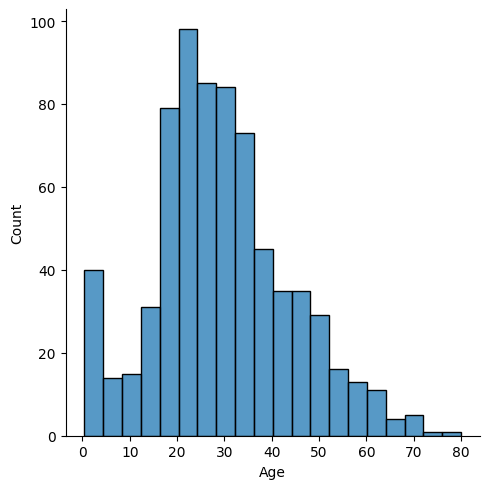

In [12]:
plt.figure(figsize=(10, 4))
sns.displot(data=titanic, x='Age', bins=20)

<Axes: xlabel='Age', ylabel='Count'>

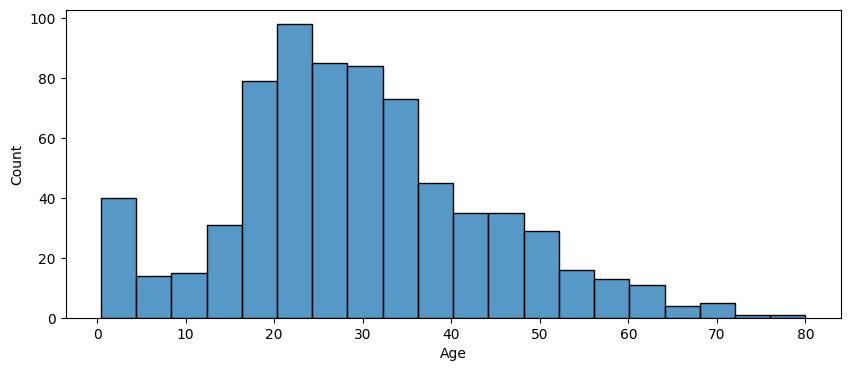

In [13]:
plt.figure(figsize=(10, 4))
sns.histplot(data=titanic, x='Age', bins=20)

## 2. 범주형 데이터 시각화

### (1) 막대그래프(barplot)
- 범주형 데이터 값에 따라 수치형 데이터 값이 어떻게 달라지는지 파악할 때 사용
- 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 그려줌
- 수치형 데이터 평균은 막대높이로, 신뢰구간은 오차 막대로 표현함

<Axes: xlabel='Pclass', ylabel='Age'>

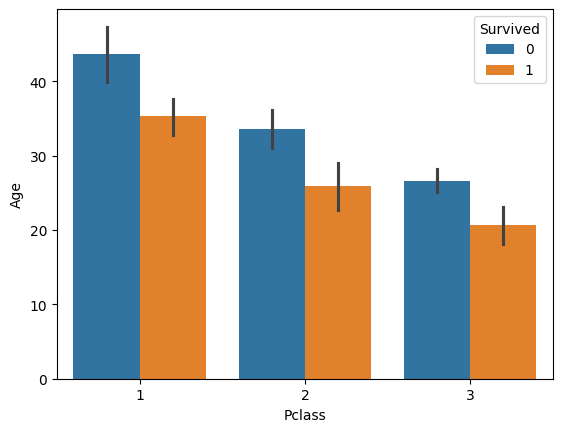

In [14]:
sns.barplot(data=titanic, x='Pclass', y='Age', hue='Survived')

<Axes: xlabel='SibSp', ylabel='Fare'>

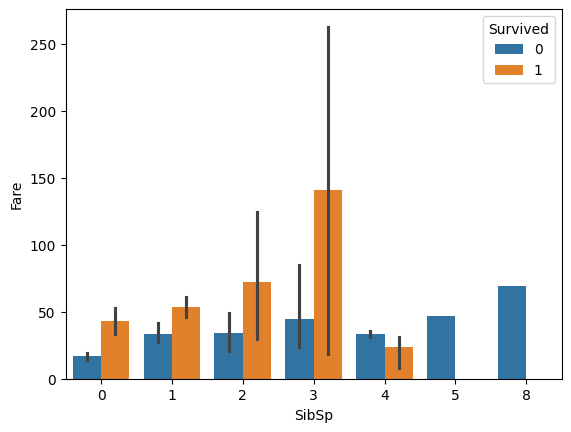

In [15]:
sns.barplot(data=titanic, x='SibSp', y='Fare', hue='Survived')

### (2) 포인트 플롯(pointplot)
- 막대 그래프와 모양만 다를 뿐 동일한 정보 제공
- 막대 그래프와 마찬가지로 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 나타냄
- 다만 그래프를 점과 선으로 나타냄

<Axes: xlabel='Pclass', ylabel='Survived'>

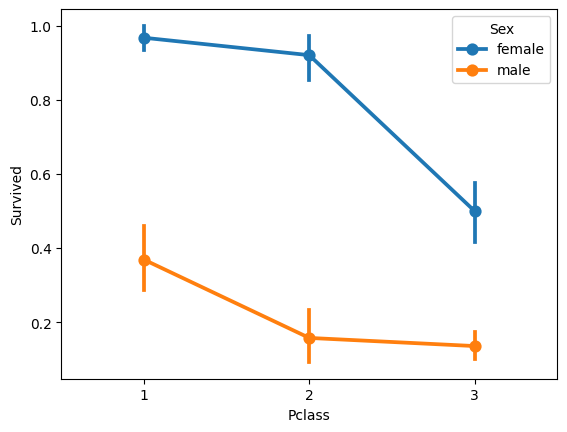

In [16]:
sns.pointplot(data=titanic, x='Pclass', y='Survived', hue='Sex')

In [17]:
# 수치형 데이터를 범주형 데이터로 변환
titanic['Age_cat'] = pd.cut(titanic['Age'], [0, 18, 25, 35, 60, 80], labels=['Children', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior'])

In [18]:
titanic.head(3).T

,0,1,2
PassengerId,1,2,3
Survived,0,1,1
Pclass,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina"
Sex,male,female,female
Age,22.0,38.0,26.0
SibSp,1,1,0
Parch,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282
Fare,7.25,71.2833,7.925


<Axes: xlabel='Age_cat', ylabel='Survived'>

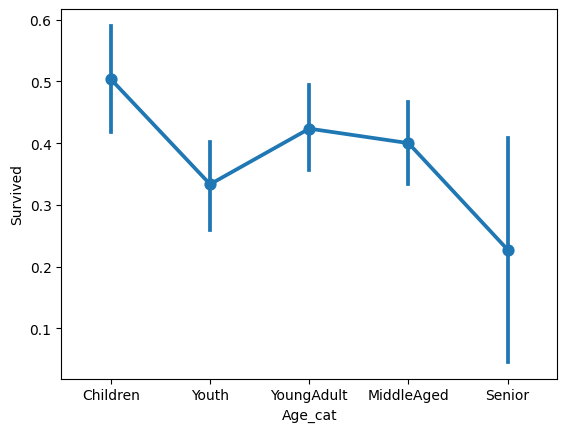

In [19]:
sns.pointplot(data=titanic, x='Age_cat', y='Survived')

<Axes: xlabel='Age_cat', ylabel='Survived'>

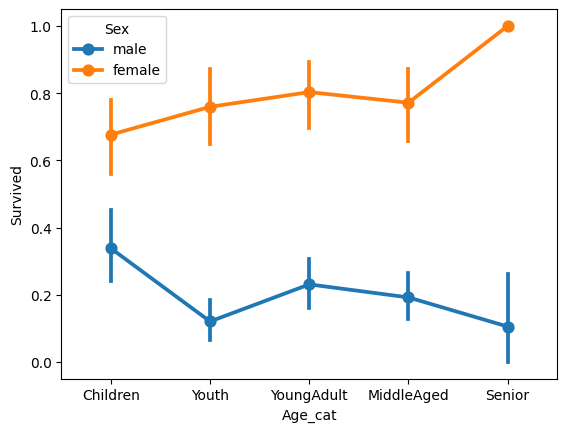

In [20]:
sns.pointplot(data=titanic, x='Age_cat', y='Survived', hue='Sex')

### (3) 박스플롯(boxplot)
- 막대그래프나 포인트플롯보다 더 많은 정보를 제공
- 5가지 요약 수치 : 최솟값, 1사분위수(Q1), 2사분위수(Q2), 3사분위수(Q3), 최댓값

- 1사분위수(Q1) : 전체 데이터 중 하위 25%에 해당하는 값
- 2사분위수(Q2): 50%에 해당하는 값
- 3사분위수(Q3) : 상위 25%에 해당하는 값
- 사분위 범위수(IQR) : Q3 - Q1
- 최댓값(Max) : Q3 + (1.5 * IQR)
- 최솟값(Min) : Q1 - (1.5 * IQR)

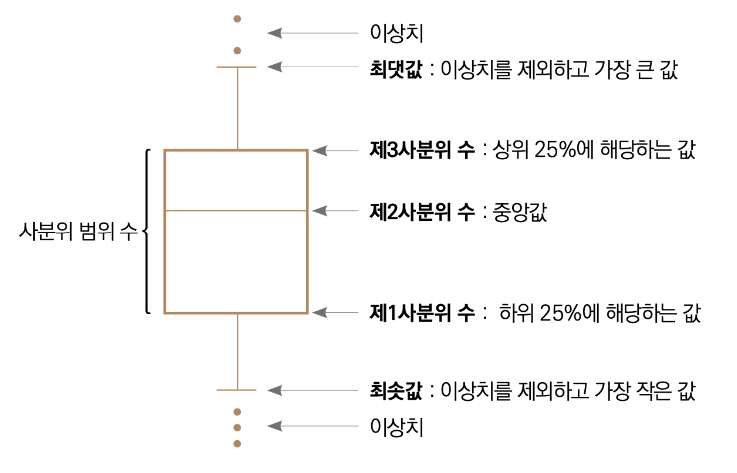

<Axes: xlabel='Age_cat', ylabel='Fare'>

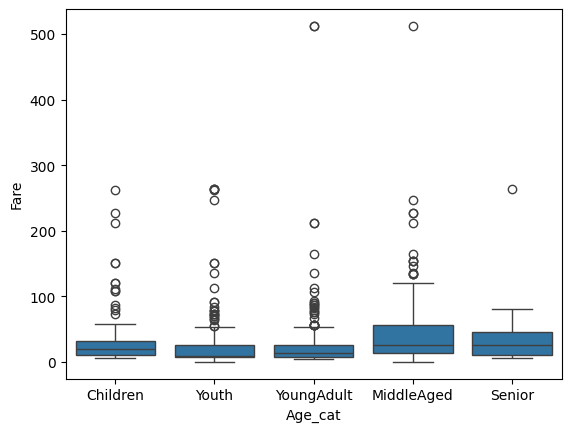

In [21]:
sns.boxplot(data=titanic, x='Age_cat', y='Fare')

### (4) 바이올린플롯(violinplot)
- 박스플롯과 커널밀도추정 함수 그래프를 합쳐 놓은 그래프
- 박스플롯에 제공하는 정보를 모두 포함하며, 모양은 커널밀도추정 함수 그래프 형태임

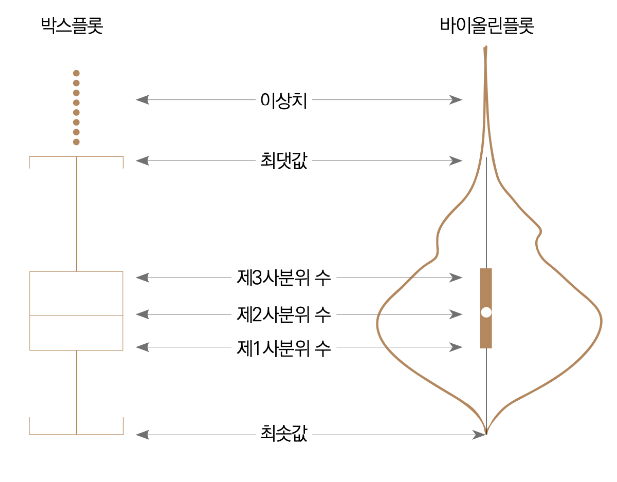

<Axes: xlabel='Pclass', ylabel='Age'>

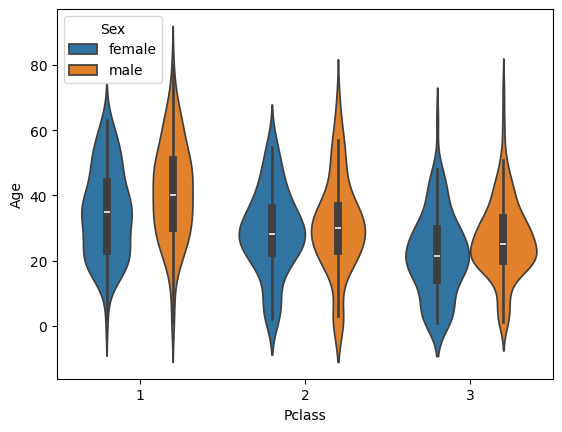

In [22]:
sns.violinplot(data=titanic, x='Pclass', y='Age', hue='Sex')

### (5) 카운트플롯(countplot)
- 카운트플롯은 범주형 데이터의 개수를 확인할 때 사용하는 그래프
- 주로 범주형 피처나 범주형 타깃값의 분포가 어떤지 파악하는 용도로 사용
- 카운트플롯을 사용하면 범주형 데이터의 개수를 파악할 수 있음


In [23]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

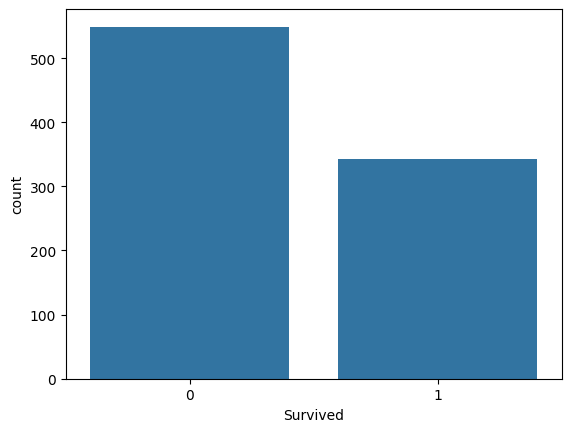

In [24]:
sns.countplot(data=titanic, x='Survived')

### (6) 파이 그래프(pie)
- 범주형 데이터별 비율을 알아볼 때 사용하기 좋은 그래프
- seaborn에서 파이 그래프를 지원하지 않아 matplotlib을 사용

In [25]:
data = titanic['Survived'].value_counts()

<Axes: ylabel='count'>

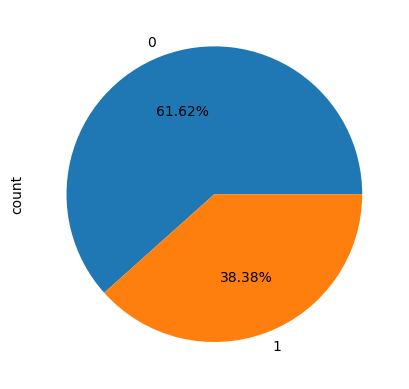

In [26]:
data.plot(kind='pie', autopct='%.2f%%')

## 3. 데이터 관계 시각화

### (1) 히트맵(heatmap)
- 데이터 간 관계를 색상으로 표현한 그래프
- 비교해야 할 데이터가 많을 때 주로 사용

In [27]:
numeric_data = titanic.select_dtypes(include=[np.number])
corr = numeric_data.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

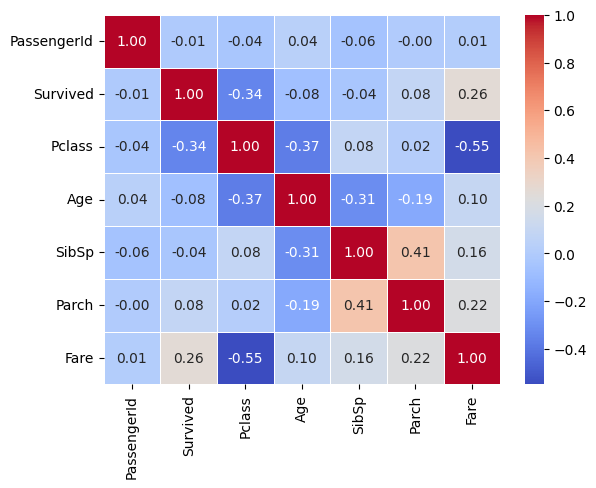

In [28]:
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidth=0.5)

* [컬러맵 정보](https://matplotlib.org/stable/tutorials/colors/colormaps.html)


### (2) 산점도(scatterplot)
- 산점도는 두 데이터의 관계를 점으로 표현하는 그래프

<Axes: xlabel='Pclass', ylabel='Fare'>

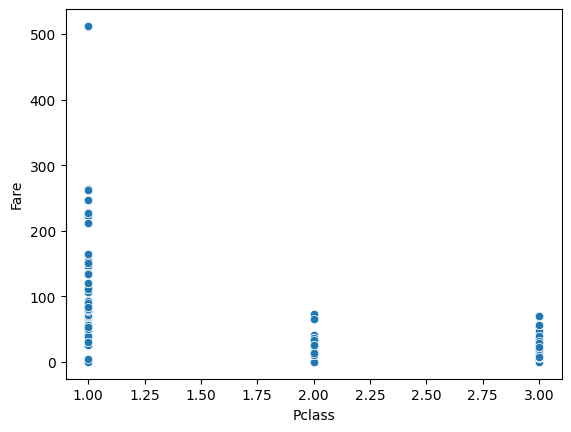

In [29]:
sns.scatterplot(data=titanic, x='Pclass', y='Fare')

<Axes: xlabel='Pclass', ylabel='Fare'>

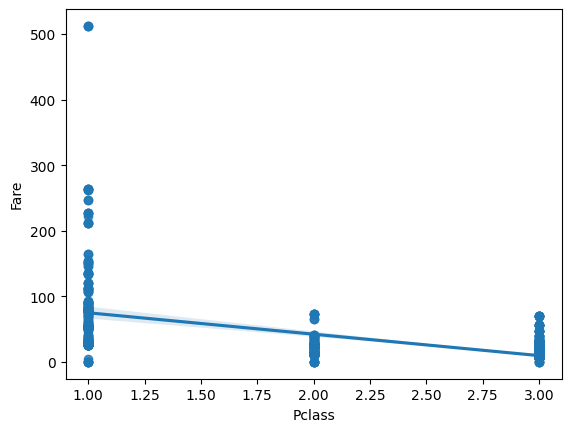

In [30]:
sns.regplot(data=titanic, x='Pclass', y='Fare')

## 4. 실습

**seaborn에서 subplots(axes) 이용하기**

**(a) subplots(axes)을 이용하여 주요 범주형 데이터의 건수를 시각화 하세요**

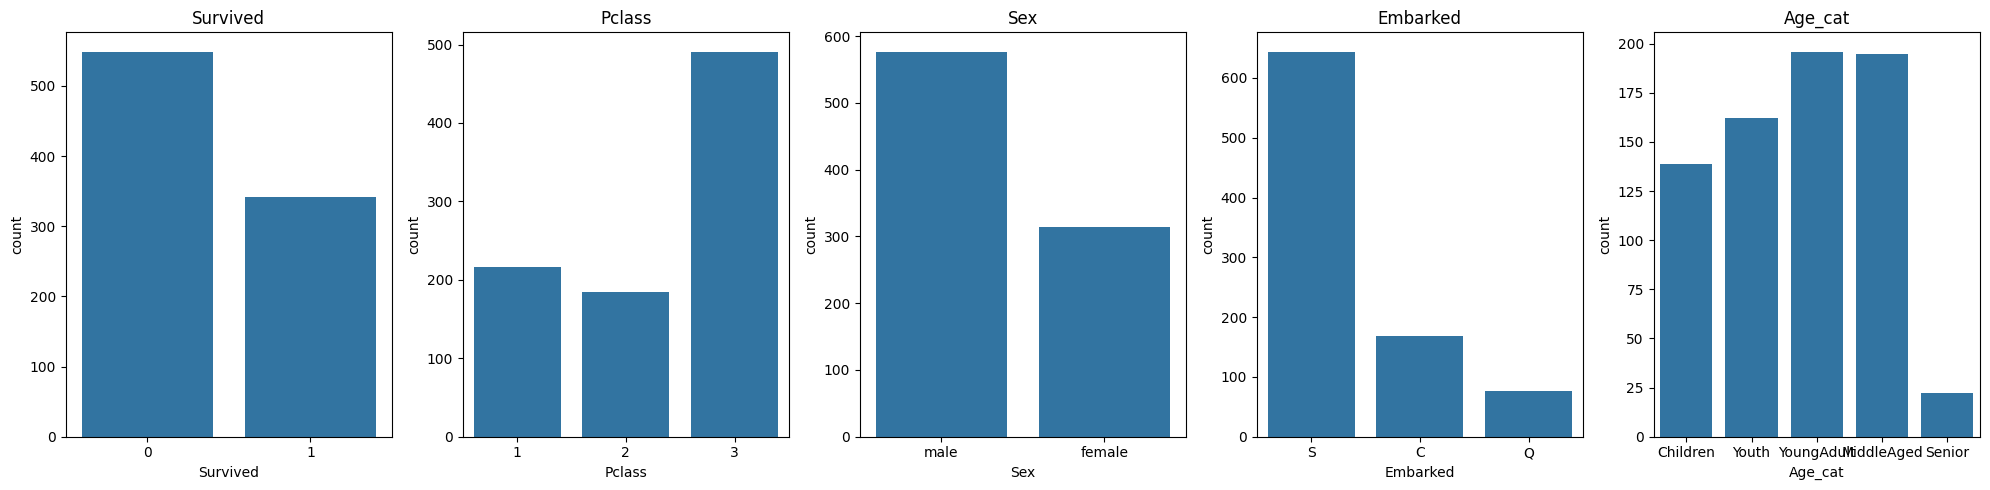

In [32]:
# todo
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked', 'Age_cat']

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=titanic, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

**(b) subplots(axes)을 이용하여 주요 범주형 데이터별 생존율 시각화 하세요**

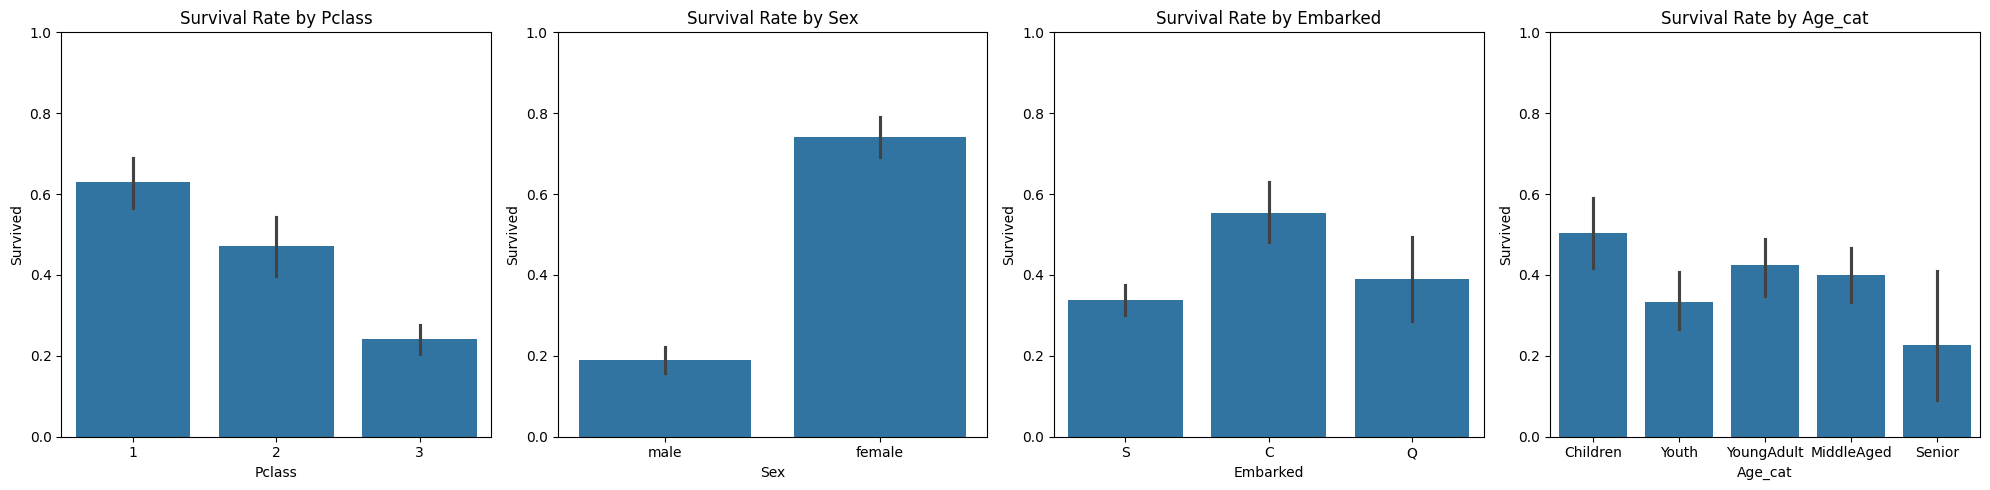

In [33]:
# todo
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
categorical_cols = ['Pclass', 'Sex', 'Embarked', 'Age_cat']

for i, col in enumerate(categorical_cols):
    sns.barplot(x=col, y='Survived', data=titanic, ax=axes[i])
    axes[i].set_title(f'Survival Rate by {col}')
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [2]:
print('hello')

hello
